# Question 1

### a-	Store the second column of the file by eliminating the header into a variable and print its mean and its standard deviation. Provide a screenshot showing the execution.[4 marks]

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn import preprocessing
df = pd.read_csv('/Users/mischafubler/Dropbox/Mischa/Bermuda 2021/EIT Big Data for Utilities/Assignment 2 Resources/iris.csv')
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


### b-	Normalize the list obtained in a- by subtracting the mean and dividing by the standard deviation. Provide a screenshot showing the execution. [4 marks]

In [5]:
sep_width = df['sepal.width']
print('Sepal Width mean:',sep_width.mean())
print('Sepal Width Std Dev.:.', sep_width.std())
#nomalize the dataset
norm = (sep_width - sep_width.mean()) / sep_width.std()
print (norm)

Sepal Width mean: 3.0573333333333337
Sepal Width Std Dev.:. 0.4358662849366982
0      1.015602
1     -0.131539
2      0.327318
3      0.097889
4      1.245030
         ...   
145   -0.131539
146   -1.278680
147   -0.131539
148    0.786174
149   -0.131539
Name: sepal.width, Length: 150, dtype: float64


### c.	Plot the data obtained in a

<AxesSubplot:ylabel='Frequency'>

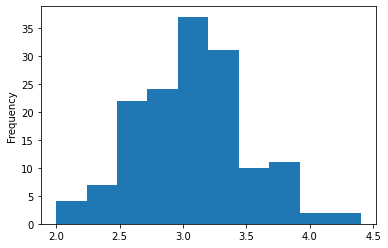

In [6]:
sep_width.plot.hist()

### d.	Create a normal distribution having the mean and the standard deviation of the data obtained in b

0.31576710633893473

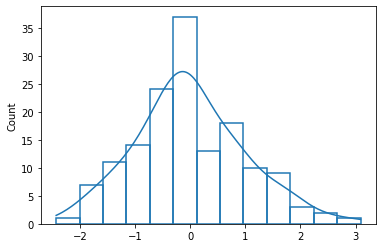

In [27]:
# normal distribution having the mean and standard deviation of the data
# imported seaborn and sklearn's preprocessing moduel in 1st cell
# sns.displot(norm, kind='histe')
sns.histplot(preprocessing.scale(sep_width), kde=True, fill=False)
skew(sep_width)

### e.	By analyzing the normal distribution obtained in d-, what do you notice?
The data set has a right skew. More of the values are lower than the mean. We might gain more insights if we eliminated some of the outliers. i.e. observations ± 2 standard deviations


# Question 2
In this exercise you are required to use scikit-learn to compare different machine learning algorithms applied on the iris dataset. 
Load the iris dataset and split the data into training and test data with a test_size of 0.4.


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# load data, assign obeservations to X and classifations to Y
data = load_iris()
X = data.data
Y = data.target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4, random_state=3)

### a-	Implement a Multi-Layer Perceptron classifier with one hidden layer containing 50 neurons. Train it on the training data and test it on the test data. Provide a screenshot showing the obtained score. [6 marks] 

In [3]:
# using lbfgs solver as it's more efficient on smaller datasets...according to documentation
classify = MLPClassifier(solver='lbfgs', hidden_layer_sizes=50)

# Train classifier
classify.fit(X_train, Y_train)

# Predictions
predictions = classify.predict(X_test)

print(metrics.accuracy_score(Y_test,predictions))

# Check Predictions
print("Sample:", X_test[48],"\nTarget:",Y_test[48], "\nPrediction:",classify.predict(X_test)[48])
print(predictions)

0.95
Sample: [5.8 2.7 5.1 1.9] 
Target: 2 
Prediction: 2
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 1
 0 2 2 2 1 0 0 2 1 0 2 2 1 0 0 2 1 1 0 2 0 2 1]


### b-	Implement a Decision Tree classifier. Train it on the training data and test it on the test data. Provide a screenshot showing the obtained score. [6 marks]

0.95
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2 1 0 2 2 1 0 0 2 1 1 0 2 0 2 1]


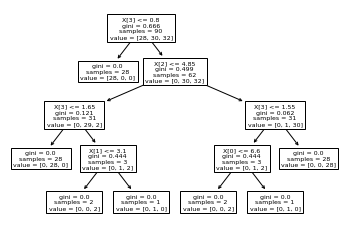

In [5]:
from matplotlib import pyplot as plt
from sklearn import tree
DT_classifier = DecisionTreeClassifier(random_state=0)
DT_classifier.fit(X_train,Y_train)
DT_predictions = DT_classifier.predict(X_test)

print(metrics.accuracy_score(Y_test,DT_predictions))
print(DT_predictions)
tree.plot_tree(DT_classifier)
plt.show()

### c-	Implement a 5-NN (5-Nearest Neighbors) classifier. Train it on the training data and test it on the test data. Provide a screenshot showing the obtained score. [6 marks]

In [6]:
Knn_classifier = KNeighborsClassifier(n_neighbors=5)
Knn_classifier.fit(X_train,Y_train)
Knn_predictions = Knn_classifier.predict(X_test)

print(metrics.accuracy_score(Y_test, Knn_predictions))
print(Knn_predictions)

0.9333333333333333
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 2 2 1 0 0 2 1 0 2 2 1 0 0 2 1 1 0 2 0 2 1]


### d-	Comment on the results. [2 marks]
MultiLevel Perceptron and Decision Tree Classifier algorithms resulted in the same level of accuracy (95%) while K-Nearest Neighbours had only 93% accuracy. I imagine the scores would not be so similar if the data set was larger or the thing being observed wasn’t as consistent. 

# Question 4
The following code lets you load the boston dataset from scikit-learn framework and creates a train/test split.
```
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

X = boston.data
y = boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,
                                                random_state=5)
```
a-	Complete the code above in order to provide the score of an MLPRegressor when trained on X_train,y_train and tested on the same. Provide a screenshot showing the correct execution and the obtained results. [3 marks]<br/>
b-	Complete the code above in order to provide the score of an MLPRegressor when trained on X_train,y_train and tested on the X_test,y_test. Provide a screenshot showing the correct execution and the obtained results. [3 marks]<br/>
c-	Comment on the results. [4 marks]


### a-	Complete the code above in order to provide the score of an MLPRegressor when trained on X_train,y_train and tested on the same. Provide a screenshot showing the correct execution and the obtained results. [3 marks]<br/>


In [6]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

boston = load_boston()
X = boston.data
y = boston.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=5)

regressor = MLPRegressor(random_state=3, max_iter=650).fit(X_train,y_train)
regressor.predict(X_train)
regressor.score(X_train,y_train)

0.8012223790921307

### b-	Complete the code above in order to provide the score of an MLPRegressor when trained on X_train,y_train and tested on the X_test,y_test. Provide a screenshot showing the correct execution and the obtained results. [3 marks]<br/>

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

boston = load_boston()
X = boston.data
y = boston.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=5)

regressor = MLPRegressor(random_state=3, max_iter=650).fit(X_train,y_train)
regressor.predict(X_test)
regressor.score(X_test,y_test)

0.8041198894838127

### c-	Comment on the results. [4 marks]

It's interesting that the score was lower when testing against the training data. How is that the case? 

# Question 6
Follow the instructions available on https://www.nltk.org/install.html to install NLTK platform on your computer. 
 
a-	Create a python program that uses NLTK to tokenize the sentence “Hi, my name is YOURNAME. This is my first program using NLTK”. Provide a screenshot showing the execution of the program. [5 marks]
 
 b-	 Update your program to generate the Part-Of-Speech tags of the tokens in the sentence. Provide a screenshot showing the execution of the program. [5 marks]
 
### a-	Create a python program that uses NLTK to tokenize the sentence “Hi, my name is YOURNAME. This is my first program using NLTK”. Provide a screenshot showing the execution of the program.


In [1]:
import nltk

my_str = "Hi, my name is Mischa. This is my first program using NLTK"

nltk.word_tokenize(my_str)

['Hi',
 ',',
 'my',
 'name',
 'is',
 'Mischa',
 '.',
 'This',
 'is',
 'my',
 'first',
 'program',
 'using',
 'NLTK']

### b- Update your program to generate the Part-Of-Speech tags of the tokens in the sentence. Provide a screenshot showing the execution of the program.

In [6]:
import nltk

my_str = "Hi, my name is Mischa. This is my first program using NLTK"

tokenized = nltk.word_tokenize(my_str)
tags = nltk.pos_tag(tokenized)

print(tags)

[('Hi', 'NNP'), (',', ','), ('my', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('Mischa', 'NNP'), ('.', '.'), ('This', 'DT'), ('is', 'VBZ'), ('my', 'PRP$'), ('first', 'JJ'), ('program', 'NN'), ('using', 'VBG'), ('NLTK', 'NNP')]


# Question 7

The following python code will let you import a list of names along with their corresponding gender:
```
import nltk
import random
from nltk.corpus import names

def get_feature(word):
    return {'last_letter': word[-1]}

labeled_names = [(name, 'male') for name in names.words('male.txt')]
labeled_names = labeled_names + [(name, 'female') for name in names.words('female.txt')]

random.shuffle(labelled_names)

featuresets = [(get_feature(n), gender) for (n, gender) in labeled_names]
train_set = featuresets[500:]
test_set = featuresets[:500]
```
The get_feature(word) function extracts the last character from a word as a feature.

You have to create and test a Naïve Bayes classifier that classifies a name into male or female. 
The following instructions could be used:
```
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)
classifier.classify(get_feature('Neo'))
```
a-	Implement the classifier and provide a screenshot showing the proper execution of the code and the accuracy on the test data. [2 marks]

b-	Print the accuracy of the classifier on the training data. Provide a screenshot showing the execution of the code. [2 marks]

c-	Comment on the obtained accuracies when applying the classifier on the training data and on the test data. [2 marks]

d-	Test the classifier on your own name and provide a screenshot showing the results. [2 marks]

e-	If we try the classifier on the following [‘anna’, ‘maria’, ‘dana’, ‘sana’, ‘vanessa’] the classifier will certainly give the same label for all of the names. Why? [2 marks]

### a-	Implement the classifier and provide a screenshot showing the proper execution of the code and the accuracy on the test data.


In [13]:
import nltk
import random
from nltk.corpus import names

def get_feature(word):
    return {'last_letter': word[-1]}

labeled_names = [(name, 'male') for name in names.words('male.txt')]
labeled_names = labeled_names + [(name, 'female') for name in names.words('female.txt')]

random.shuffle(labeled_names)

featuresets = [(get_feature(n), gender) for (n, gender) in labeled_names]
train_set = featuresets[500:]
test_set = featuresets[:500]

classifier = nltk.NaiveBayesClassifier.train(train_set)
print("Test Accuracy:",nltk.classify.accuracy(classifier, test_set))
classifier.classify(get_feature('Mischa'))

Test Accuracy: 0.764


'female'

 ### b-	Print the accuracy of the classifier on the training data. Provide a screenshot showing the execution of the code

In [14]:
print("Test Accuracy:",nltk.classify.accuracy(classifier, train_set))

Test Accuracy: 0.7627619559376679


### c-	Comment on the obtained accuracies when applying the classifier on the training data and on the test data.

The accuracy of the classifier against the test set is higher than the accuracy against the training set.

### d-	Test the classifier on your own name and provide a screenshot showing the results

In [19]:
classifier.classify(get_feature('Mischa'))

'female'

### e-	If we try the classifier on the following [‘anna’, ‘maria’, ‘dana’, ‘sana’, ‘vanessa’] the classifier will certainly give the same label for all of the names. Why?

In [23]:
print(names.words('female.txt'))

'Lilith', 'Lilla', 'Lilli', 'Lillian', 'Lillis', 'Lilllie', 'Lilly', 'Lily', 'Lilyan', 'Lin', 'Lina', 'Lind', 'Linda', 'Lindi', 'Lindie', 'Lindsay', 'Lindsey', 'Lindsy', 'Lindy', 'Linea', 'Linell', 'Linet', 'Linette', 'Linn', 'Linnea', 'Linnell', 'Linnet', 'Linnie', 'Linzy', 'Liora', 'Liorah', 'Lira', 'Lisa', 'Lisabeth', 'Lisandra', 'Lisbeth', 'Lise', 'Lisetta', 'Lisette', 'Lisha', 'Lishe', 'Lissa', 'Lissi', 'Lissie', 'Lissy', 'Lita', 'Liuka', 'Livia', 'Liz', 'Liza', 'Lizabeth', 'Lizbeth', 'Lizette', 'Lizzie', 'Lizzy', 'Loella', 'Lois', 'Loise', 'Lola', 'Lolande', 'Loleta', 'Lolita', 'Lolly', 'Lona', 'Lonee', 'Loni', 'Lonna', 'Lonni', 'Lonnie', 'Lora', 'Lorain', 'Loraine', 'Loralee', 'Loralie', 'Loralyn', 'Loree', 'Loreen', 'Lorelei', 'Lorelle', 'Loren', 'Lorena', 'Lorene', 'Lorenza', 'Loretta', 'Lorettalorna', 'Lorette', 'Lori', 'Loria', 'Lorianna', 'Lorianne', 'Lorie', 'Lorilee', 'Lorilyn', 'Lorinda', 'Lorine', 'Lorita', 'Lorna', 'Lorne', 'Lorraine', 'Lorrayne', 'Lorri', 'Lorrie', 'L